In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [5]:
df=pd.read_csv('D:\DS-Input-Files\Ecommerce_Customers.csv')
df.head(1)


,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 25.5+ KB


In [18]:
df=df.drop('Email',axis=1)
df=df.drop('Address',axis=1)
df.head(1)

,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,Violet,34.497268,12.655651,39.577668,4.082621,587.951054


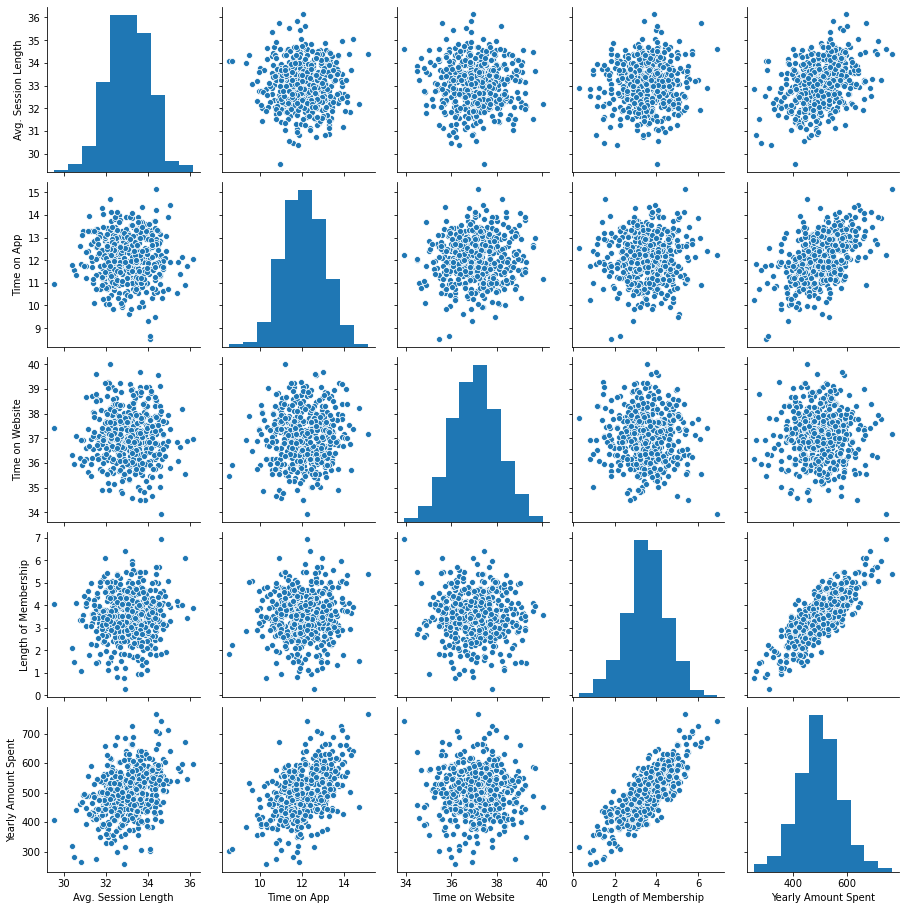

In [20]:
sns.pairplot(df)

In [21]:
df.corr()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
Avg. Session Length,1.000000,-0.027826,-0.034987,0.060247,0.355088
Time on App,-0.027826,1.000000,0.082388,0.029143,0.499328
Time on Website,-0.034987,0.082388,1.000000,-0.047582,-0.002641
Length of Membership,0.060247,0.029143,-0.047582,1.000000,0.809084
Yearly Amount Spent,0.355088,0.499328,-0.002641,0.809084,1.000000


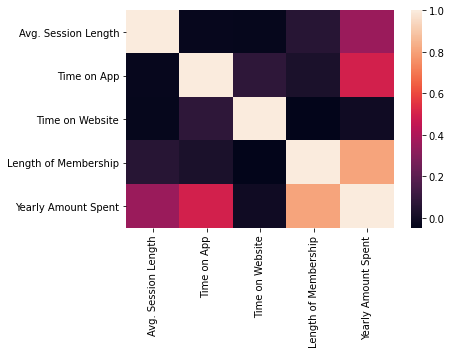

In [23]:
sns.heatmap(df.corr())

In [24]:
df.columns

Index(['Avatar', 'Avg. Session Length', 'Time on App', 'Time on Website',
       'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [26]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [29]:
df=df.drop('Length of Membership',axis=1)

In [30]:
df.columns

Index(['Avatar', 'Avg. Session Length', 'Time on App', 'Time on Website',
       'Yearly Amount Spent'],
      dtype='object')

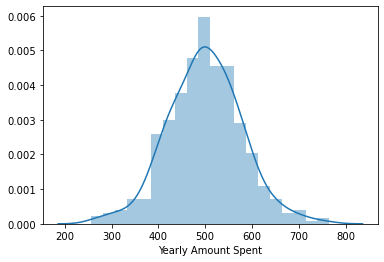

In [31]:
sns.distplot(df['Yearly Amount Spent'])

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
df.head(2)

,Avatar,Avg. Session Length,Time on App,Time on Website,Yearly Amount Spent
0,Violet,34.497268,12.655651,39.577668,587.951054
1,DarkGreen,31.926272,11.109461,37.268959,392.204933


In [55]:
x=df.drop('Yearly Amount Spent',axis=1)
x=df.drop('Avatar',axis=1)
x.head(1)

,Avg. Session Length,Time on App,Time on Website,Yearly Amount Spent
0,34.497268,12.655651,39.577668,587.951054


In [56]:
y=df['Yearly Amount Spent']
y.head(3)

0    587.951054
1    392.204933
2    487.547505
Name: Yearly Amount Spent, dtype: float64

In [76]:
x.columns

Index(['Avg. Session Length', 'Time on App', 'Time on Website',
       'Yearly Amount Spent'],
      dtype='object')

In [77]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=101)

In [78]:
##checking the train and test - size - uisng shape
x_train.head(1)
y_test.shape


(200,)

In [59]:
import pandas_profiling
pandas_profiling.ProfileReport(df)

In [79]:
from sklearn.preprocessing import StandardScaler

In [80]:
scx=StandardScaler()

In [81]:
x_train_std=scx.fit_transform(x_train)
x_train_std

array([[ 1.26799522,  1.45940118,  0.23617032,  1.13712939],
       [ 1.09362244,  1.22111315,  1.88136988,  0.77445013],
       [-1.75352154,  0.1119345 , -1.69436204, -0.9373782 ],
       ...,
       [-1.1990249 ,  0.46066757,  0.38023355, -0.72627437],
       [ 0.83265112, -0.46928258,  0.02145387,  0.32507668],
       [-0.84063534, -0.67939728,  1.18861913,  0.46629362]])

In [82]:
from sklearn.linear_model import LinearRegression

In [83]:
lr=LinearRegression()

In [84]:
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [85]:
lr.coef_

array([-2.56673532e-15,  2.32983953e-14, -2.05447122e-15,  1.00000000e+00])

In [86]:
lr.intercept_

-5.684341886080802e-14

In [87]:
predictions=lr.predict(x_test)

In [88]:
predictions

array([452.31567548, 401.03313522, 410.06961106, 599.40609205,
       586.15587018, 535.48077519, 588.71260551, 712.39632681,
       462.89763615, 532.72480546, 327.37795259, 492.5568337 ,
       543.34016626, 403.7669021 , 765.51846194, 537.84619527,
       708.93518487, 501.92826487, 564.79096901, 571.21600483,
       408.64035107, 548.51852928, 467.4278485 , 490.6004425 ,
       571.47103412, 410.60294395, 534.77148495, 368.65478495,
       540.26340041, 443.44186006, 605.0610388 , 640.18774001,
       493.18021625, 568.71757593, 501.10024523, 560.44379217,
       447.68790654, 432.48116856, 436.58074035, 461.92087689,
       587.57479948, 445.74984124, 632.12358814, 505.11334354,
       506.13234244, 518.06455798, 577.73602485, 541.97220376,
       356.61556789, 472.99224667, 467.80092437, 552.94034545,
       256.67058229, 487.54750487, 521.24078024, 304.13559158,
       507.39006179, 387.35707274, 478.88539132, 426.15454771,
       537.2150527 , 590.56271965, 744.2218671 , 544.40

In [89]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [97]:
print(mean_absolute_error(y_test,predictions))
print(mean_squared_error(y_test,predictions))
print(np.sqrt(mean_squared_error(y_test,predictions)))
print(r2_score(y_test,predictions))

3.012701199622825e-14
3.1342390397517063e-27
5.598427493280329e-14
1.0


In [98]:
x_test

,Avg. Session Length,Time on App,Time on Website,Yearly Amount Spent
18,32.187812,14.715388,38.244115,452.315675
361,32.077590,10.347877,39.045156,401.033135
104,31.389585,10.994224,38.074452,410.069611
4,33.330673,12.795189,37.536653,599.406092
156,32.294642,12.443048,37.327848,586.155870
...,...,...,...,...
464,32.533240,14.121784,38.406329,689.235700
78,32.597183,10.889567,38.212571,488.786061
160,32.838100,12.364342,38.039109,468.913501
124,33.014792,11.761172,37.570164,514.336558
